## **Import Process:**

In [225]:
### Mounting Google Drive to Python Colab
from google.colab import drive
drive.mount('/content/MyDrive') # Follow your path directory to fetch the correct file
# drive.mount('/content', force_remount=True)

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [226]:
### Importing Necessary Libraries
import numpy as np              # high-level math functions for multi-dim arrays and matrices
import pandas as pd             # data manipulation and analysis
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import seaborn as sns
import plotly.express as px
import chardet
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [227]:
# @title Import using API directly to Kaggle/ alternative method.
# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'most-streamed-spotify-songs-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5218014%2F8700156%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240711%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240711T002756Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4bd12639ce07aed73e6d6e5be545380bdb6f99dc404b38def0eb7617e3df6f12a9d9b7cc3a848b3b2da22ecddf1f95b9102fc5b9776e3d1ab5ad4ad154ad889708061bfc0482ab41c87664c87253a0e5e8bb01c30792dc49f30d339e009d33147f88cc99f102afe1d8a79d6579400919d46dc686108e17a0147a9cf1b580cb2a1ac1933b6e4663fbc0294613b4990bf07ccff674b181bb73a3d26af0e15df65422196f6c866f8bbd73e12015eb85192a1b89cf4c059b748cdd56ddd04923bfce221efbd0c921c54be426befe8de2c1b7fbda217f738bfa82db163e1e08eabcb7e49993078df5d54990aa90f28abb49440932ece32709ce14bad20214bc39476e'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')

In [228]:
# @title Import using API/ alternative method.
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import plotly.express as px
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# import seaborn as sns

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [229]:
# @title Identifying possible encoding errors
# Identifying encoding:
# with open('/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv', 'rb') as file:
#     data = file.read(100000)
#     result = chardet.detect(data)
#     encoding = result['encoding']
#     print(f"Detected encoding: {encoding}")

In [230]:
### Importing data file
curr_path = "/content/MyDrive/MyDrive/PYTHON/Spotify Project 2024/Most Streamed Spotify Songs 2024.csv"
df = pd.read_csv(curr_path, encoding = 'unicode_escape')
# df_summary = pd.read_csv(curr_path, encoding="ISO-8859-1") #- This also works
df.head(5)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


## **Data cleaning and exploration:**

In [231]:
# Previewing file and features
print(df.columns)
print('')
df.info()

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist        

In [232]:
# Checking for Nulls
print(df.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [233]:
# Dropping 'TIDAL Popularity' field due it being completely NULL
df.drop('TIDAL Popularity', axis=1, inplace=True)
print(df.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
Explicit Track                   0
dtype: int64


In [234]:
# Replacing NULL values with zeroes
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4600 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4600 non-null   object 
 8   Spotify Playlist Count      4600 non-null   object 
 9   Spotify Playlist Reach      4600 non-null   object 
 10  Spotify Popularity          4600 non-null   float64
 11  YouTube Views               4600 non-null   object 
 12  YouTube Likes               4600 non-null   object 
 13  TikTok Posts                4600 

In [235]:
# Checking for duplicates
df[df.duplicated()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,TCAGJ2289254,"2,424",28.9,"227,893,586","28,139","12,480,714",...,"129,172",34,5.0,"1,370",49.0,"56,972,562","26,968","1,336,043","708,143",0
3450,Dembow,Dembow,Danny Ocean,12/8/2017,USWL11700269,"3,441",23.3,"579,189,526","60,397","11,805,084",...,"5,406",9,20.0,"37,649",12.0,"6,723,858","7,832",0,"1,619,550",0


In [236]:
# Removed duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4598 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4598 non-null   object 
 8   Spotify Playlist Count      4598 non-null   object 
 9   Spotify Playlist Reach      4598 non-null   object 
 10  Spotify Popularity          4598 non-null   float64
 11  YouTube Views               4598 non-null   object 
 12  YouTube Likes               4598 non-null   object 
 13  TikTok Posts                4598 non-n

In [237]:
# Removing commas before converting certain columns to numeric data types
df = df.replace(",", "", regex=True)

In [238]:
# Converting column features to numerics
cols = df.columns[6:]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis = 1)

# Verifying
df.dtypes
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4598 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4598 non-null   float64
 8   Spotify Playlist Count      4598 non-null   float64
 9   Spotify Playlist Reach      4598 non-null   float64
 10  Spotify Popularity          4598 non-null   float64
 11  YouTube Views               4598 non-null   float64
 12  YouTube Likes               4598 non-null   float64
 13  TikTok Posts                4598 non-n

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0.0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1.0
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0.0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,0.0,11822942.0,0.0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1.0


In [239]:
# Converting 'Release Date' to date time data type
df['Release Date'] = pd.to_datetime(df['Release Date'], format = '%m/%d/%Y')

# Creating Release 'Year' & 'Month' fields
df['Year'] = df['Release Date'].dt.year
yeardf = df.groupby('Year')['Track'].size().reset_index()

df['Month'] = df['Release Date'].dt.strftime('%B')
monthdf = df.groupby('Month')['Track'].size().reset_index()

# Final preview of finalized dataset
df.head(3)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Year,Month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,...,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0.0,2024,April
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884.0,28113.0,174597137.0,...,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1.0,2024,May
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283.0,54331.0,211607669.0,...,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0.0,2024,March


# **Visualizations:**

In [240]:
# Plot for Number of songs released through the years up to 2024
# Ordered by year and color coded based on number of tracks
fig1 = px.bar(yeardf[yeardf['Year'] > 2005],
             x='Year',
             y='Track',
              color = 'Track')
fig1.update_layout(title_text = '<b>Number of songs released through 2024</b>', title_x=0.5)

In [241]:
# Plot for Number of songs released by month through the years up to 2024
# Ordered by month and color coded based on number or tracks
fig2 = px.bar(monthdf,
             x='Month',
             y='Track',
             color = 'Track',
             category_orders= {'Month': ['January','February','March','April','May','June','July','August','September','October','November','December']})
fig2.update_layout(title_text = '<b>Number of songs released by Months</b>', title_x=0.5)

In [242]:
# Pie Ratio of Explicit vs. Not Explicit songs
dff =df.copy()
dff['Explicit Track'] = dff['Explicit Track'].replace({0: 'Not Explicit', 1: 'Explicit'})
pie = px.pie(dff,names ='Explicit Track')
pie.update_layout(title_text = '<b>Ratio of Explicit vs. Not Excplicit<b>', title_x = 0.47)

In [243]:
# Spotify top 20 streamed with Explicit Indicator
spstream = df.copy()
spstream.sort_values(by = 'Spotify Streams', ascending = False, inplace = True)
spstream = spstream.loc[spstream['Track'].shift() != spstream['Track']]
fig = px.bar(spstream.head(20)[::-1],
             y = 'Track',
             x='Spotify Streams',
             color = 'Explicit Track',
             height = 1000,
             color_continuous_scale = ['#486fd9','#d94848'])
fig.update_layout(showlegend = True, title_text='<b>Top 20 streamed Songs</b><br><sub>Via spotify</sub><br>', title_x=0.5)
fig

In [244]:
# Youtube top 20 streamed with Explicit Indicator
youstream = df.copy()
youstream.sort_values(by ='YouTube Views',ascending =False, inplace = True)
youstream = youstream.loc[youstream['Track'].shift() != youstream['Track']]
fig = px.bar(youstream.head(20)[::-1],
             y = 'Track',
             x='YouTube Views',
             color = 'Explicit Track',
             height=700, width=1500,
             color_continuous_scale=['#486fd9','#d94848'],
            labels=['Exceplicit','Not'], hover_data=['YouTube Likes'])
fig. update_coloraxes(showscale = True)
fig.update_layout(showlegend = True, title_text = '<b>Top 20 streamed Songs</b><br><sub>Via YouTube Views</sub><br>', title_x=0.55)
fig

In [245]:
# Top 20 from TikTok with Explicit Indicator
tikstream = df.copy()
tikstream.sort_values(by = 'TikTok Views', ascending = False, inplace = True)
tikstream = tikstream.loc[tikstream['Track'].shift() != tikstream['Track']]
fig = px.bar(tikstream.head(20)[::-1],
             y = 'Track',
             x='TikTok Views',
             color = 'Explicit Track',
             height = 700, width = 1500, color_continuous_scale = ['#486fd9','#d94848'],
            labels = ['Exceplicit','Not'])
fig.update_coloraxes(showscale = True)
fig.update_layout(showlegend = True, title_text = '<b>Top 20 streamed songs</b><br><sub>Via Tiktok Views</sub><br>', title_x=0.55)
fig

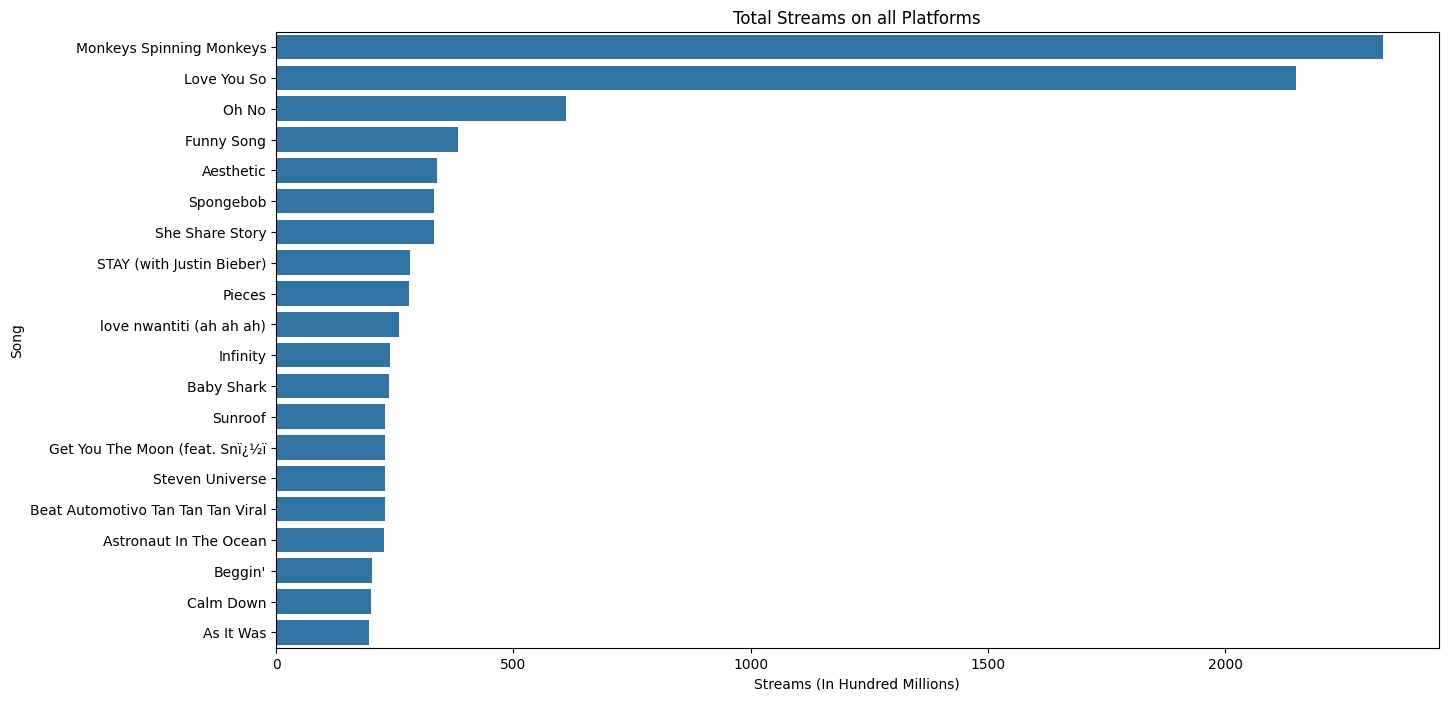

In [246]:
# Combining Total Streams from the 5 total platforms with streaming metrics
df['Total Streams'] = df['Spotify Streams'] + df['YouTube Views'] + df['TikTok Views'] + df['Pandora Streams'] + df['Soundcloud Streams']
df_total = df.sort_values(by= 'Total Streams', ascending=False)

# Bar Plot
df_total = df_total.iloc[0:20]
plt.figure(figsize=(15, 8))
sns.barplot(y=df_total['Track'],
            x=(df_total['Total Streams']/100000000))
            # hue= df['Total Streams'], # Nice options to add depth, but drastically reduces performance speed
            # legend=False,
            # edgecolor='black',
            # order = df['Total Streams'])
plt.title('Total Streams on all Platforms')
plt.xlabel('Streams (In Hundred Millions)')
plt.ylabel('Song')
plt.show()

              count
Artist             
Taylor Swift     63
Drake            63
Bad Bunny        60
KAROL G          32
The Weeknd       31



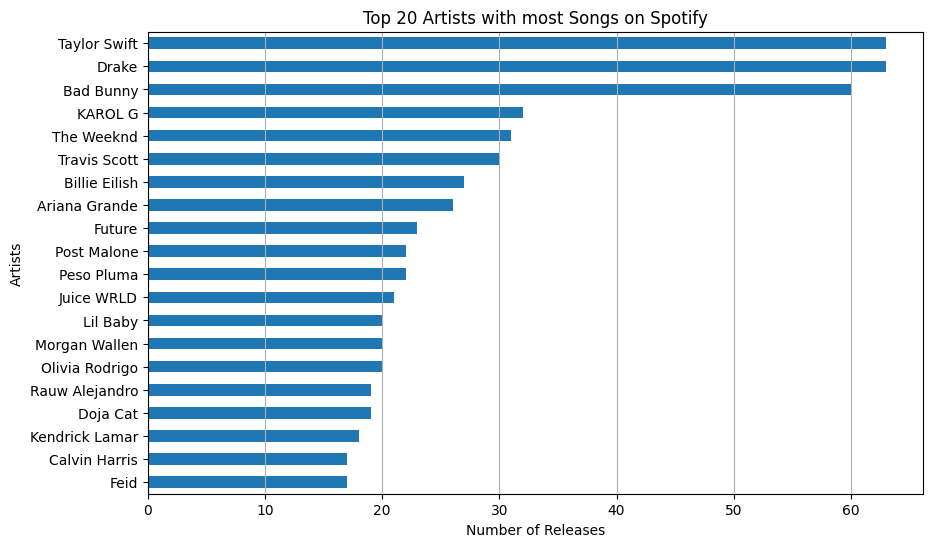

In [247]:
# Counting total releases grouped by artist
df_artist = df['Artist'].value_counts()
df_artist = df_artist.sort_values(ascending=False)
df_artist = pd.DataFrame(df_artist)
print(df_artist.head())
print('')

# Top 20 Artists with most number of Tracks
plt.figure(figsize=(10, 6))
ax = plt.gca()
df_artist.head(20).plot(kind= 'barh', ax= ax, legend= False)
ax.invert_yaxis()
plt.xlabel('Number of Releases')
plt.ylabel('Artists')
plt.title('Top 20 Artists with most Songs on Spotify')
plt.grid(axis='x')

Artist
Billie Eilish        5
MUSIC LAB JPN        4
Dua Lipa             2
Kendrick Lamar       2
Bad Bunny            2
SZA                  2
Bizarrap             2
Rema                 2
Sabrina Carpenter    2
Doja Cat             2
Taylor Swift         2
Name: count, dtype: int64



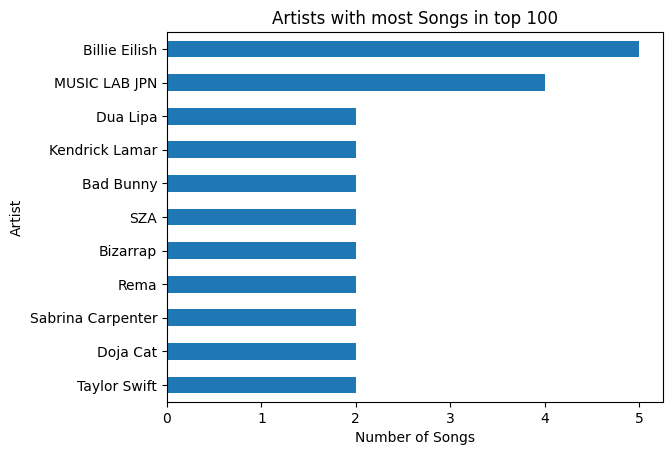

In [248]:
# Artists with the most songs in the top 100
df_pos = df.iloc[0:101]  # Taking top 100 values
# print(df_pos.info())
df_freq = df_pos['Artist'].value_counts()
df_freq = df_freq.iloc[0:11]
print(df_freq)
print('')

# Plotting
ax = plt.gca()  # Get the current axis instance
df_freq.head(15).plot(kind='barh', ax= ax)  # Plot on the same axis
ax.invert_yaxis()
plt.ylabel('Artist')
plt.title('Artists with most Songs in top 100')
plt.xlabel('Number of Songs')
plt.show()

In [249]:
# Top 10 albums grouped by 'Total Streams'
df_album = df.groupby(['Album Name'])['Total Streams'].sum().reset_index(name= 'Streams')
df_album = df_album.sort_values(by= 'Streams', ascending= False)
df_album = df_album.iloc[0:10]

# Plot to visualize the groupings / Hover over to eplore more about the album info
fig = px.treemap(df_album, path=['Album Name'],
                 values=(df_album['Streams']/100000000),
                 title= 'Top 10 Albums Streamed',
                 hover_data= {'Streams': True})
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Streams: %{customdata[0]:.2f} billion<extra></extra>',
    customdata= df_album[['Streams']] / 100000000,
    )
fig.show()